# 1. 丢弃法

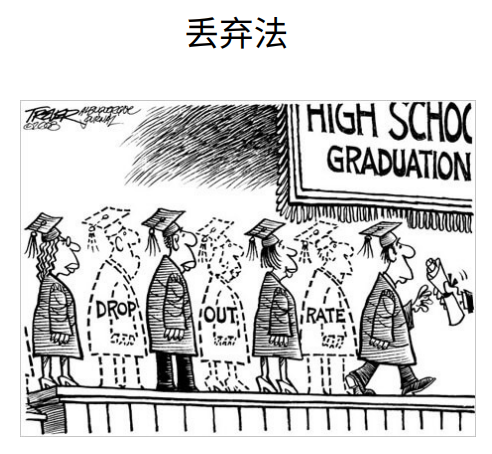

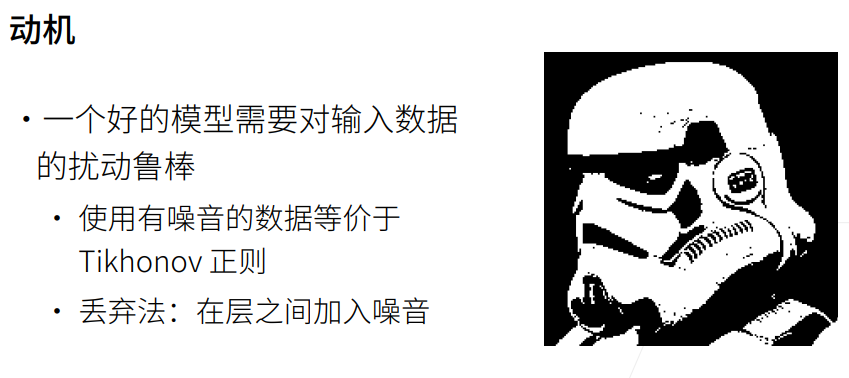

① 这里除以1-p是为了$x_{i}^{‘}$与原来的$x_{i}$的期望相同。

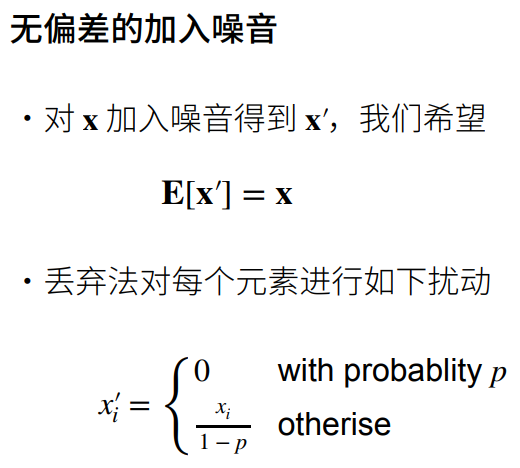

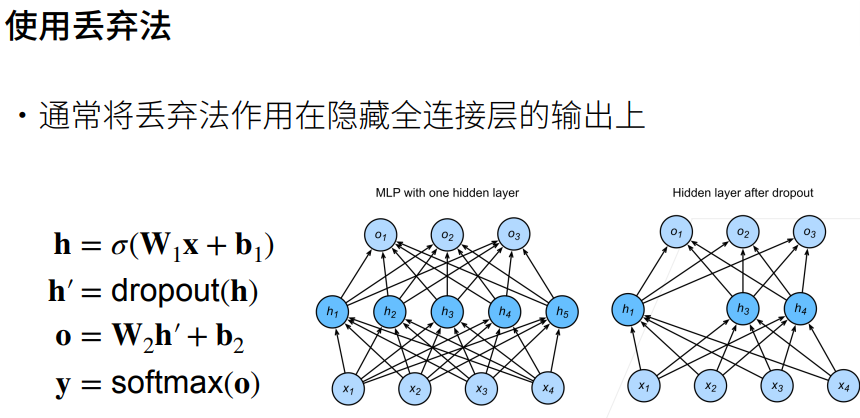

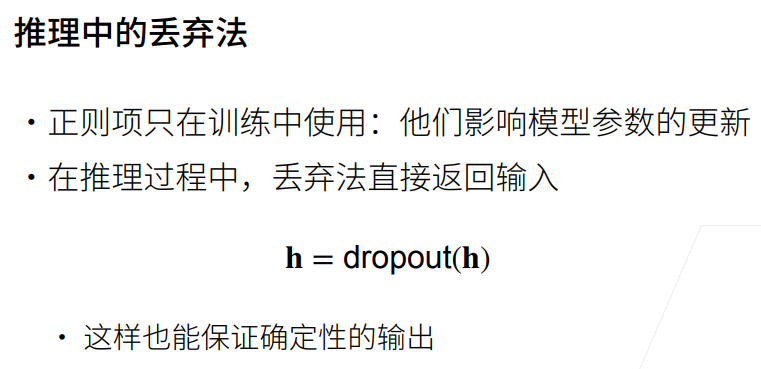

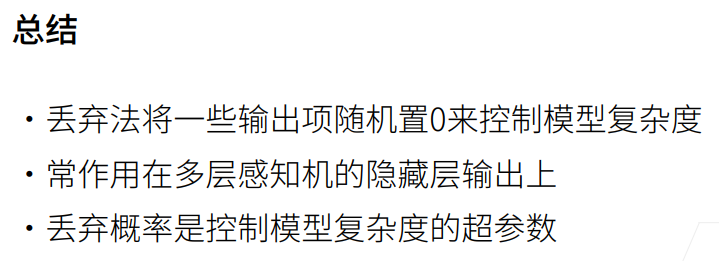

# 2. 丢弃法（使用自定义）

In [1]:
# 实现dropout_layer函数，该函数以dropout的概率丢弃张量输入x中的元素
import torch
from torch import nn
from d2l import torch as d2l

def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1 # dropout大于等于0，小于等于1，否则报错
    if dropout == 1:
        return torch.zeros_like(X) # 如果dropout为1，则X返回为全0
    if dropout == 0:
        return X # 如果dropout为1，则X返回为全原值
    mask = (torch.randn(X.shape)>dropout).float() # 取X.shape里面0到1之间的均匀分布，如果值大于dropout，则把它选出来
    #print((torch.randn(X.shape)>dropout)) # 返回的是布尔值，然后转布尔值为0、1
    return mask * X / (1.0 - dropout) 

X = torch.arange(16,dtype=torch.float32).reshape((2,8))
print(X)
print(dropout_layer(X, 0.))
print(dropout_layer(X, 0.5)) # 有百分之50的概率变为0
print(dropout_layer(X, 1.))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  0.,  4.,  6.,  0.,  0.,  0., 14.],
        [16.,  0.,  0.,  0.,  0.,  0.,  0., 30.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


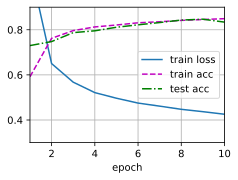

In [2]:
# 定义具有两个隐藏层的多层感知机，每个隐藏层包含256个单元
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10 ,256, 256

dropout1, dropout2 = 0.2, 0.5

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2,is_training=True):       
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()
        
    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1,self.num_inputs))))
        if self.training == True: # 如果是在训练，则作用dropout，否则则不作用
            H1 = dropout_layer(H1, dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training == True:
            H2 = dropout_layer(H2,dropout2)
        out = self.lin3(H2) # 输出层不作用dropout
        return out
        
net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)

# 训练和测试
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss()
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(),lr=lr)
d2l.train_ch3(net,train_iter,test_iter,loss,num_epochs,trainer)

# 3. 丢弃法（使用框架）

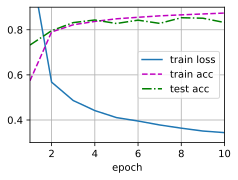

In [3]:
import torch
from torch import nn
from d2l import torch as d2l

# 简洁实现
num_epochs, lr, batch_size = 10, 0.5, 256
dropout1, dropout2 = 0.2, 0.5
loss = nn.CrossEntropyLoss()
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

net = nn.Sequential(nn.Flatten(),nn.Linear(784,256),nn.ReLU(),
                   nn.Dropout(dropout1),nn.Linear(256,256),nn.ReLU(),
                   nn.Dropout(dropout2),nn.Linear(256,10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight,std=0.01)
    
net.apply(init_weights)

trainer = torch.optim.SGD(net.parameters(),lr=lr)
d2l.train_ch3(net,train_iter, test_iter, loss, num_epochs,trainer)